# 프로젝트 : 고객 정보를 활용한 보험료 예측

## 0.데이터셋 소개
- 배경 : 보험의 고객 데이터로 다음의 Column으로 구성되며, 보험료의 결정요인 및 이에 대한 데이터 시각화 등을 실
습하기 위한 데이터셋임

- 보험료 결정 데이터(insurance.csv) 변수
    - age     : 나이
    - sex      : 성별
    - bmi     : BMI지수
    - children : 자녀 수
    - smoker : 흡연여부
    - region : 사는 지역 0/1/2/3
    - charges : 건강 보험에서  청구하는 개인  의료 비용

In [1]:
# colab 에서 사용시시
#!gdown 1Z31L8mZKOjB3g8RKrPHrM-Q6trkEzCN1

# 1.데이터  분석  준비

In [2]:
# 데이터 분석 및 시각화를 위한 패키지 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 로딩 및 내용 확인
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1.1 데이터 기초 분석

In [4]:
# 데이터 크기 알아보기
df.shape    # ... 코드 입력

(1338, 7)

In [5]:
# 데이터  컬럼별  정보  알아보기
df.info()    # ... 코드 입력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# 숫자 데이터 값 알아보기
df.describe()   # ... 코드 입력

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# 결측치  유무  확인
df.isnull().sum()    # ... 코드 입력

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 데이터의  왜도/첨도
- 의료비  데이터의  왜도는  1.51
- 분포의  오른쪽에  있는  꼬리가  더  길거나  더  두꺼울  때를  의미하며  평균과  중앙값은  최빈값보다  큼

- Summary Statistics of Medical Costs
    - count     1338.000000
    - mean     13270.422265
    - std      12110.011237
    - min       1121.873900
    - 25%       4740.287150
    - 50%       9382.033000
    - 75%      16639.912515
    - max      63770.428010
    - Name: charges, dtype: float64
    - skew:  1.5141797118745743
    - kurtosis:  1.595821363956751
    - missing charges values: 0
    - missing smoker values: 0

> 첨도는  분포의  꼬리부분의 길이와  중앙부분의  뾰족함에 대한  정보를  제공하는 통계량이다.    
    - 정규분포의  첨도는  0이다.   
    - 첨도가  0보다  크면 정규분포보다 긴  꼬리를  갖고, 분포가 보다 중앙부분에 덜 집중되게되므로 중앙부분이 뾰족한 모양을 가지게  된다.

In [8]:
# 데이터의  왜도/첨도
from scipy.stats import kurtosis, skew, stats
print("Summary Statistics of Medical Costs")
print(df['charges'].describe())
print("skew:  {}".format(skew(df['charges'])))
print("kurtosis:  {}".format(kurtosis(df['charges'])))
print("missing charges values: {}".format(df['charges'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
skew:  1.5141797118745743
kurtosis:  1.595821363956751
missing charges values: 0
missing smoker values: 0


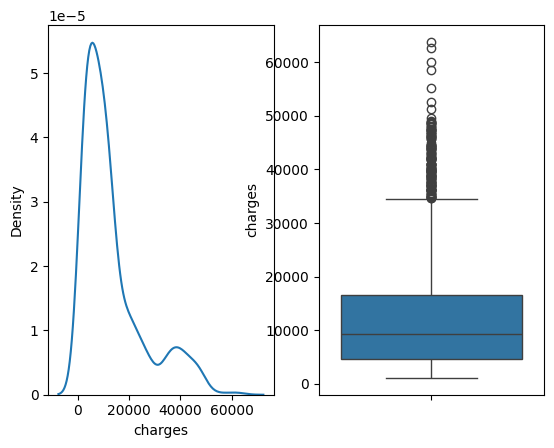

In [9]:
f, axes = plt.subplots(1, 2)
# kdeplot
sns.kdeplot(df['charges'], ax=axes[0])    # ... 코드 입력
# boxplot
sns.boxplot(df['charges'], ax=axes[1])    # ... 코드 입력
plt.show()

In [10]:
# 데이터의 상관계수
insur_corr = df.select_dtypes(include=np.number).corr()    # ... 코드 입력

insur_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [11]:
# 데이터의 공분산
numerical_df = df.select_dtypes(include=np.number)
insur_cov = numerical_df.cov()
insur_cov

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


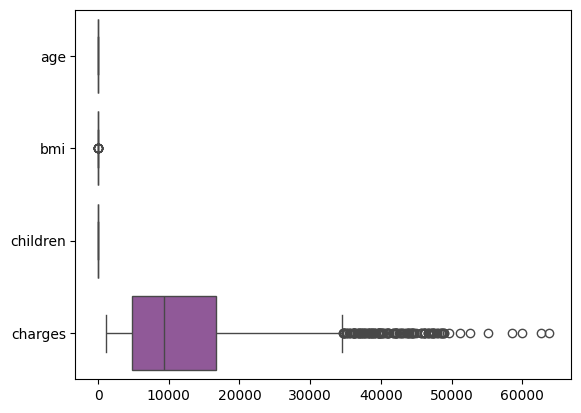

In [12]:
# 분포  및  박스플롯
ax = sns.boxplot(data = df, orient = "h", color = "violet", palette = "Set1")
plt.show()

In [13]:
# 이상치  식별  함수
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append( j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)

In [14]:
# 이상치  식별
numeric_columns = df.select_dtypes(include=np.number).columns
x = df[numeric_columns]
outlier_detect(x)


 Outliers for Column :  age  Outliers count  0
[]

 Outliers for Column :  bmi  Outliers count  9
[np.float64(49.06), np.float64(48.07), np.float64(47.52), np.float64(47.41), np.float64(50.38), np.float64(47.6), np.float64(52.58), np.float64(47.74), np.float64(53.13)]

 Outliers for Column :  children  Outliers count  0
[]

 Outliers for Column :  charges  Outliers count  139
[np.float64(39611.7577), np.float64(36837.467), np.float64(37701.8768), np.float64(38711.0), np.float64(35585.576), np.float64(51194.55914), np.float64(39774.2763), np.float64(48173.361), np.float64(38709.176), np.float64(37742.5757), np.float64(47496.49445), np.float64(37165.1638), np.float64(39836.519), np.float64(43578.9394), np.float64(47291.055), np.float64(47055.5321), np.float64(39556.4945), np.float64(40720.55105), np.float64(36950.2567), np.float64(36149.4835), np.float64(48824.45), np.float64(43753.33705), np.float64(37133.8982), np.float64(34779.615), np.float64(38511.6283), np.float64(35160.13457), np

In [15]:
# 유일값  측정
df.nunique()    # ... 코드 입력

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [16]:
# 데이터  컬럼명  수정
df.rename(columns={'sex': 'gender'}, inplace=True, level=None)

# gender 항목의 값 출력하기
df.gender.value_counts()   # ... 코드 입력

gender
male      676
female    662
Name: count, dtype: int64

In [17]:
# 중복값  제거
df = df.drop_duplicates()   # ... 코드 입력
df.duplicated().sum()

np.int64(0)

## 1.2 데이터 시각화

Text(0.5, 1.0, 'Distribution of Charges')

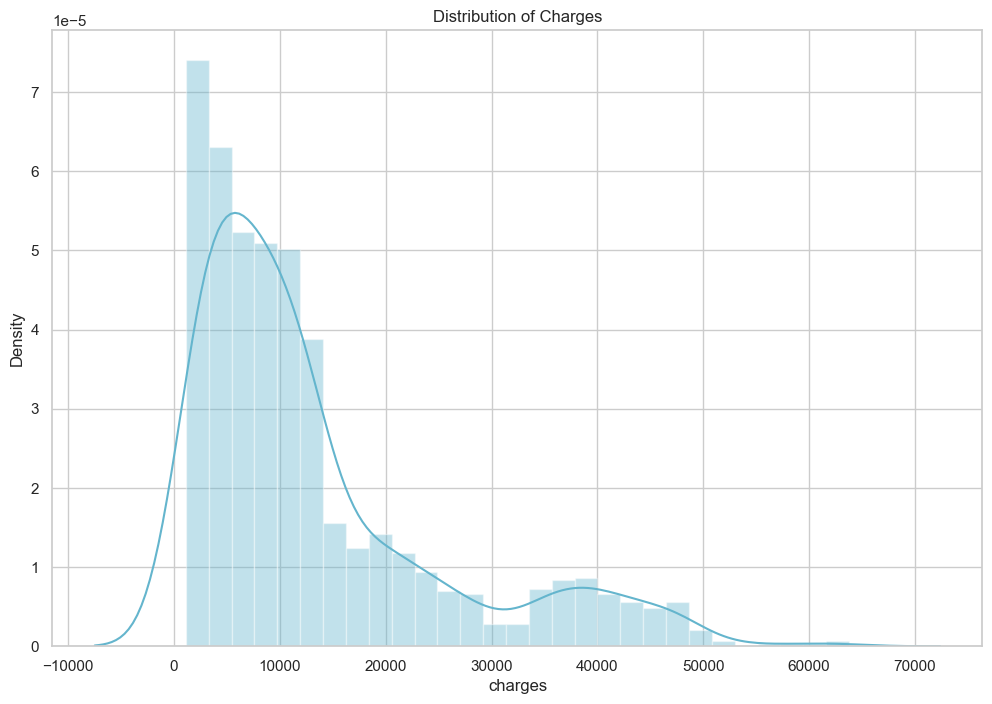

In [18]:
# 의료비 분포 확인
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

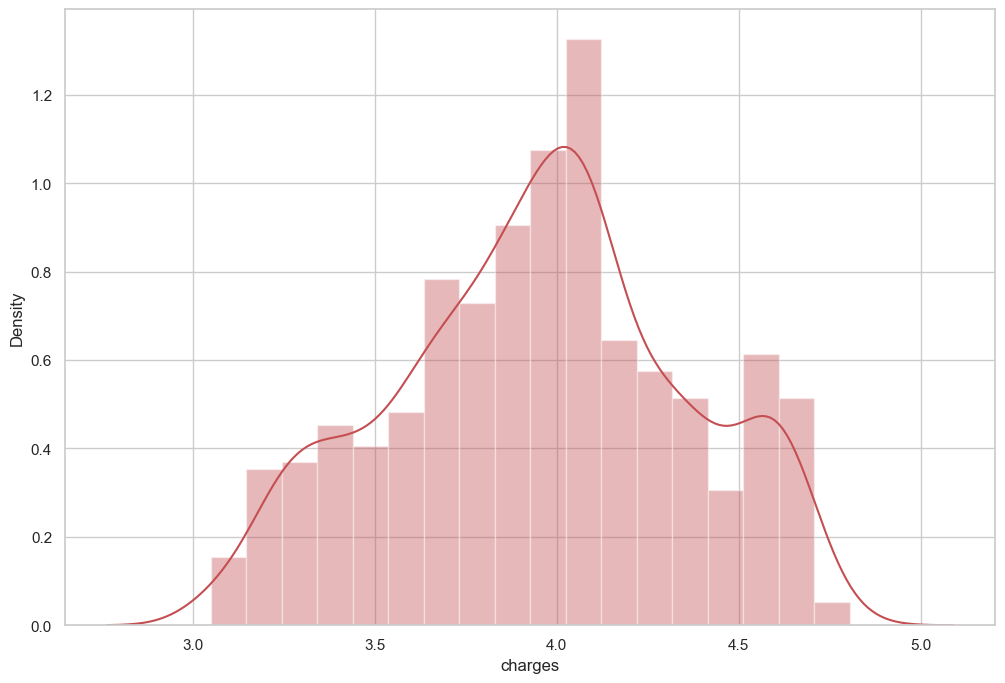

In [19]:
# 로그스케일로 변환한 의료비 분포 확인
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

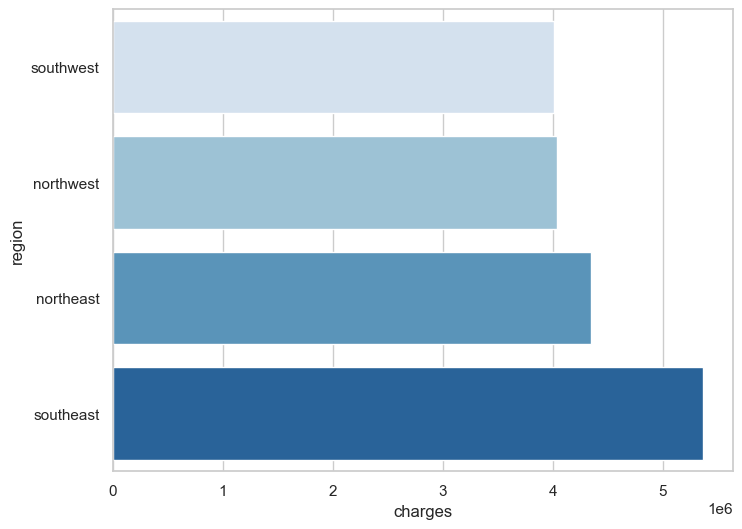

In [20]:
# 지역별  분포
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
# x와 y를 키워드 인수로 지정합니다.
# ax = sns.barplot(x=charges.head().index, y=charges.head(), palette='Blues') # 세로방향
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues', orient='h')

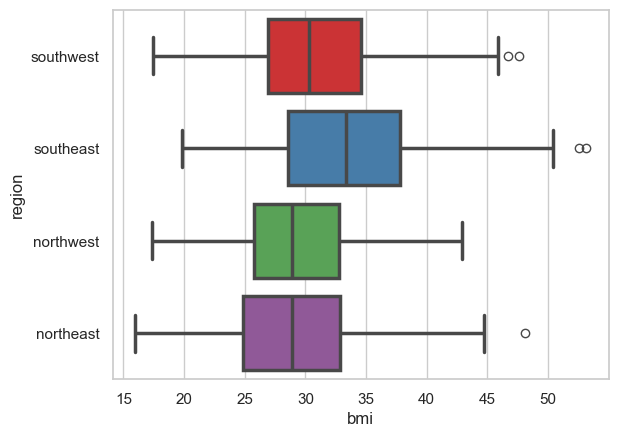

In [21]:
# 지역별 BMI 분포
#ax = sns.boxplot(x="bmi" ,y="region", data=df, linewidth=2.5)  # 단일 색상
ax = sns.boxplot(x="bmi", y="region", data=df, linewidth=2.5, palette="Set1")
plt.show()

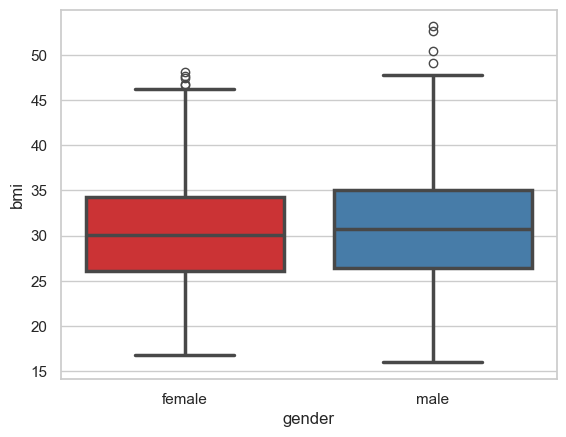

In [22]:
# 성별  BMI 분포
ax = sns.boxplot(x="gender" ,y="bmi", data=df, linewidth=2.5, palette="Set1")
plt.show()

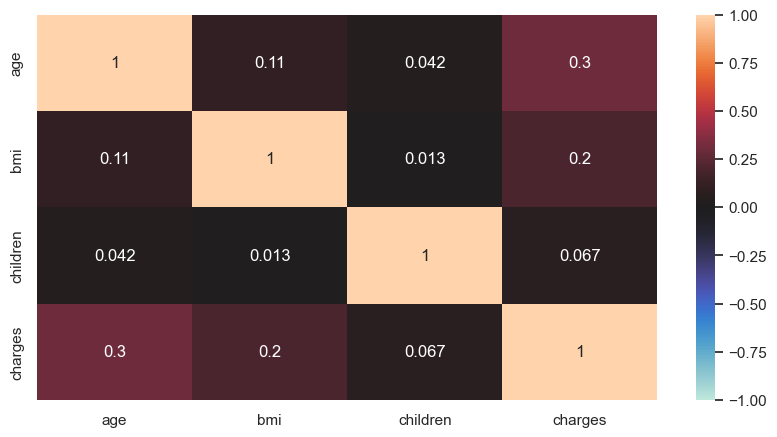

In [23]:
# 상관계수 히트맵
# Set the width and height of the figure
plt.figure(figsize=(10,5))
corr = df.select_dtypes(include=np.number).corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

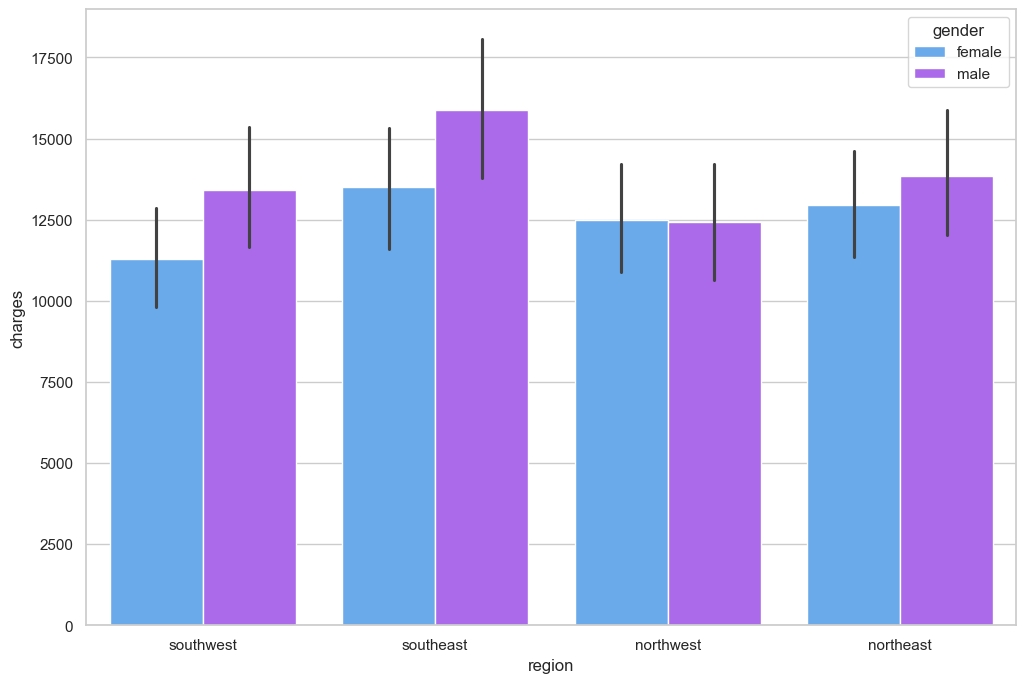

In [24]:
# 지역별 성별 의료비 평균 비교
f, ax = plt.subplots(1, 1, figsize=(12, 8))
# ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool') # 오류 : 위에서 sex 컬럼명을 gender 로 변경함
ax = sns.barplot(x='region', y='charges', hue='gender', data=df, palette='cool')

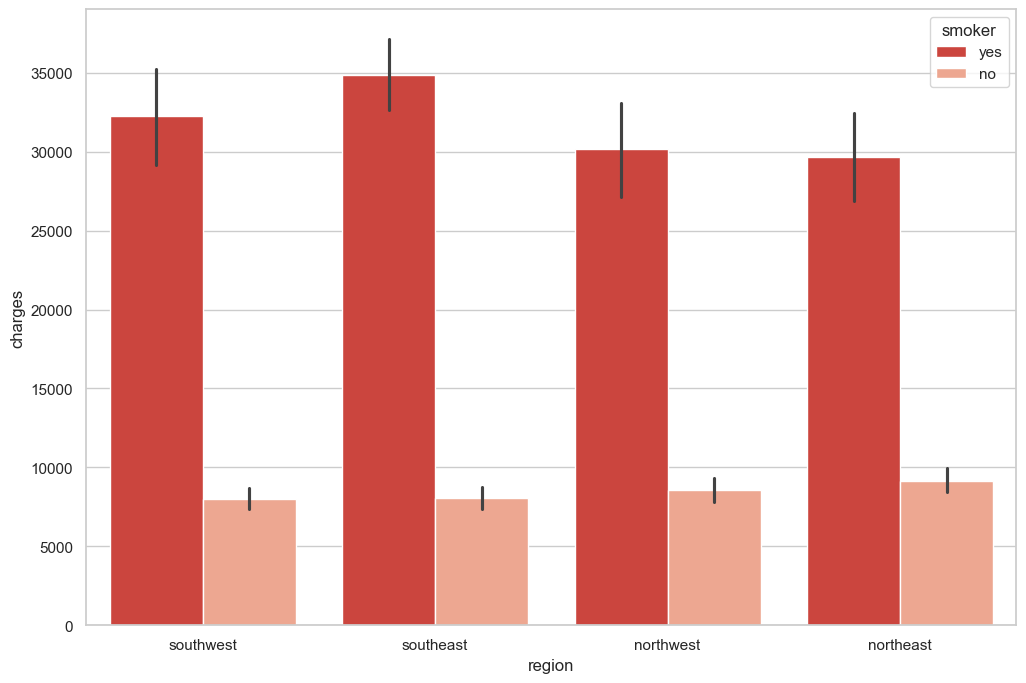

In [25]:
# 지역별 흡연여부별 의료비 비교
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',hue='smoker', data=df, palette='Reds_r')

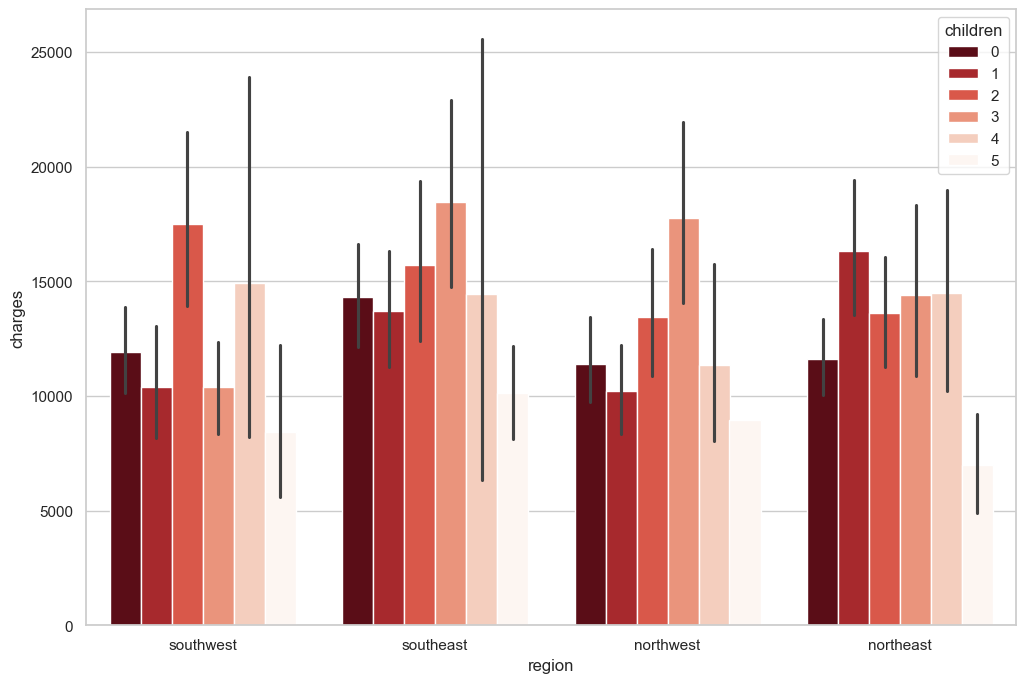

In [26]:
# 지역별 자녀수별 의료비 비교
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges', hue='children', data=df, palette='Reds_r')

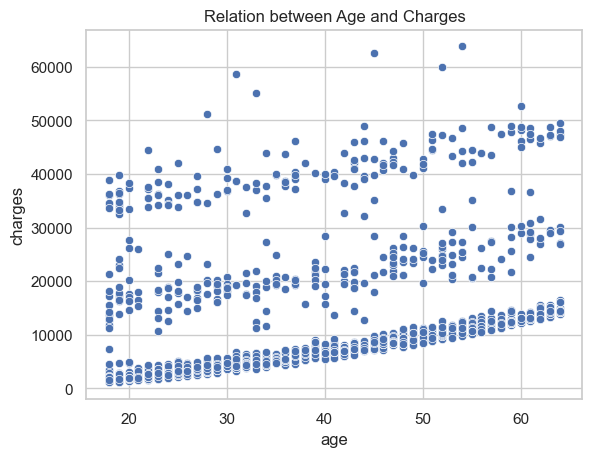

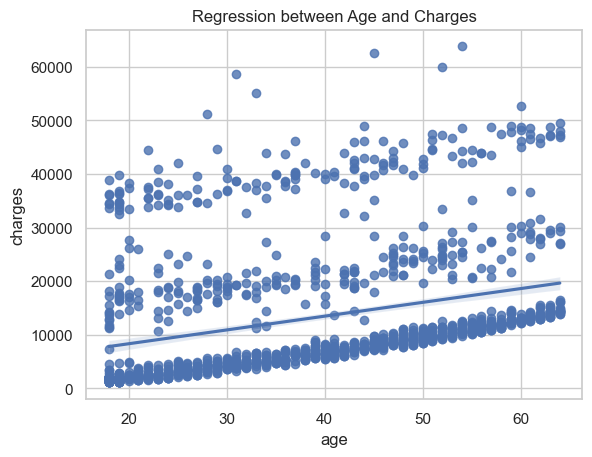

In [27]:
# 산점도를 그려서 연령(age)과 의료비(charge)간의 상관 관계 찾기
plt.title('Relation between Age and Charges')
sns.scatterplot(x=df['age'],y=df['charges'])
plt.show()

plt.title('Regression between Age and Charges')
sns.regplot(x=df['age'],y=df['charges'])
plt.show()

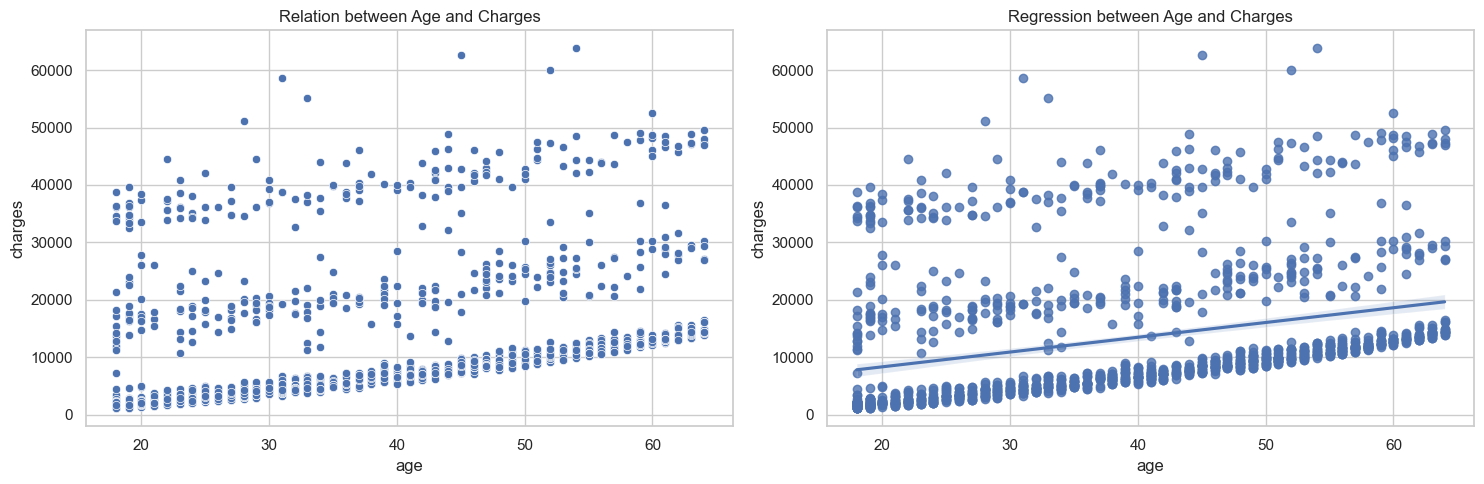

In [28]:
# 2개의 그래프를 가로로 나타내기
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1행 2열, figsize로 가로 크기 조정

# 첫 번째 그래프 (scatterplot)
axes[0].set_title('Relation between Age and Charges')
sns.scatterplot(x=df['age'], y=df['charges'], ax=axes[0])

# 두 번째 그래프 (regplot)
axes[1].set_title('Regression between Age and Charges')
sns.regplot(x=df['age'], y=df['charges'], ax=axes[1])

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()

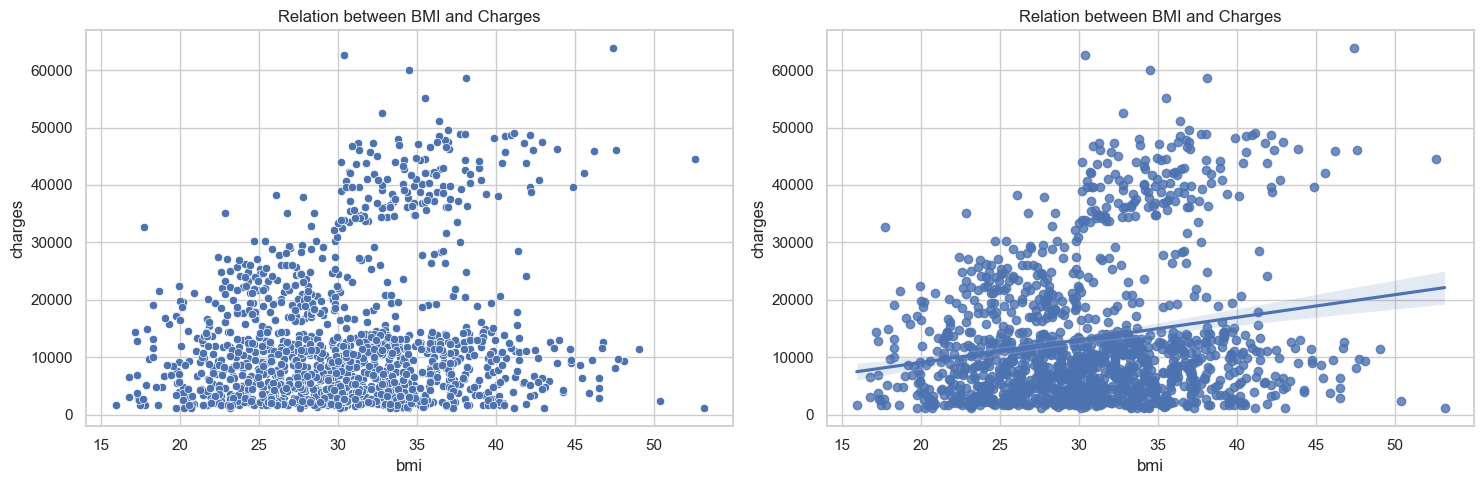

In [29]:
# 산점도를 그려서 BMI와 의료비(charge)간의 상관 관계 찾기.
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1행 2열, figsize로 가로 크기 조정

# 첫 번째 그래프 (scatterplot)
axes[0].set_title('Relation between BMI and Charges')
sns.scatterplot(x=df['bmi'],y=df['charges'], ax=axes[0])

# 두 번째 그래프 (regplot)
axes[1].set_title('Relation between BMI and Charges')
sns.regplot(x=df['bmi'], y=df['charges'], ax=axes[1])

plt.tight_layout()  # 그래프 간 간격 조정
plt.show()

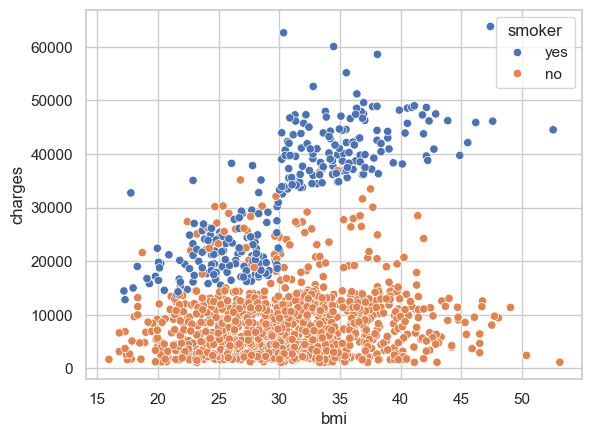

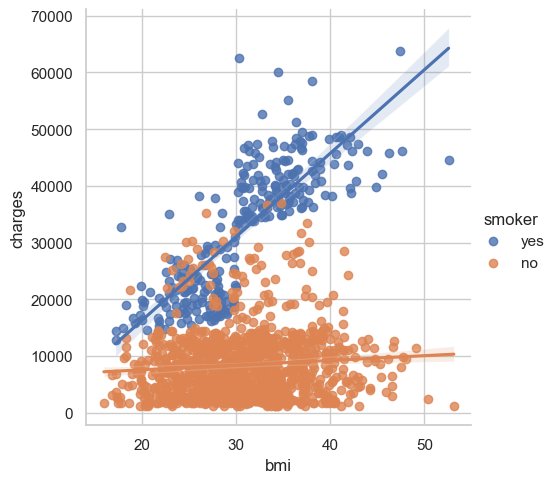

In [30]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

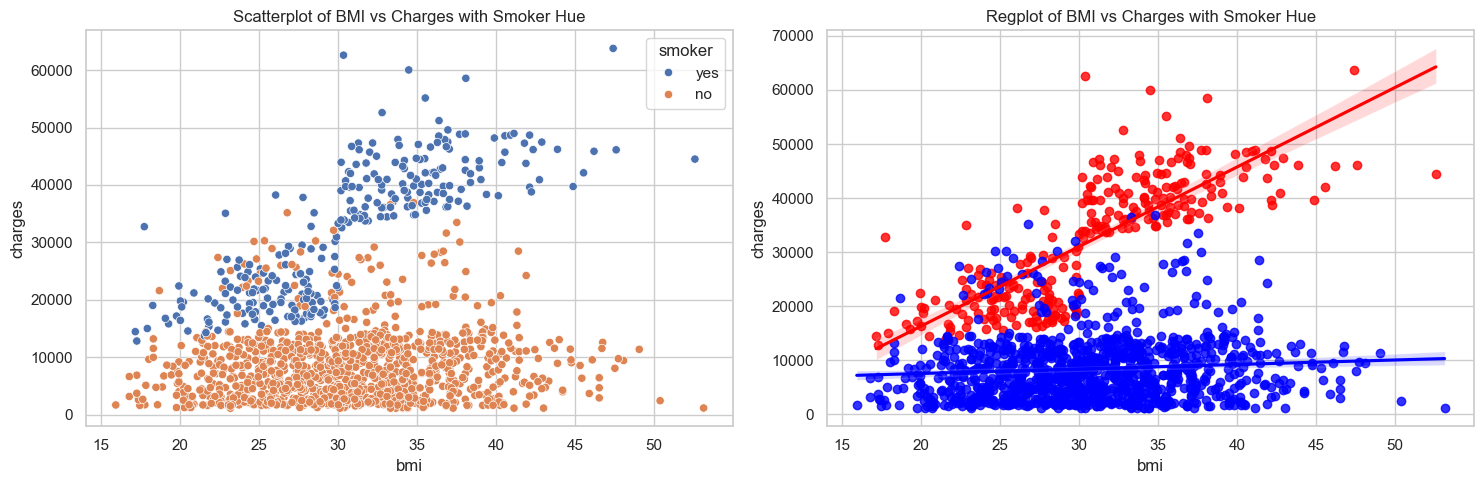

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 첫 번째 그래프 (scatterplot with hue)
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'], ax=axes[0])
axes[0].set_title('Scatterplot of BMI vs Charges with Smoker Hue')

# 두 번째 그래프 (lmplot adapted for subplot)
sns.regplot(x="bmi", y="charges", data=df[df["smoker"] == "yes"],
            ax=axes[1], scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
sns.regplot(x="bmi", y="charges", data=df[df["smoker"] == "no"],
            ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axes[1].set_title('Regplot of BMI vs Charges with Smoker Hue')

plt.tight_layout()
plt.show()

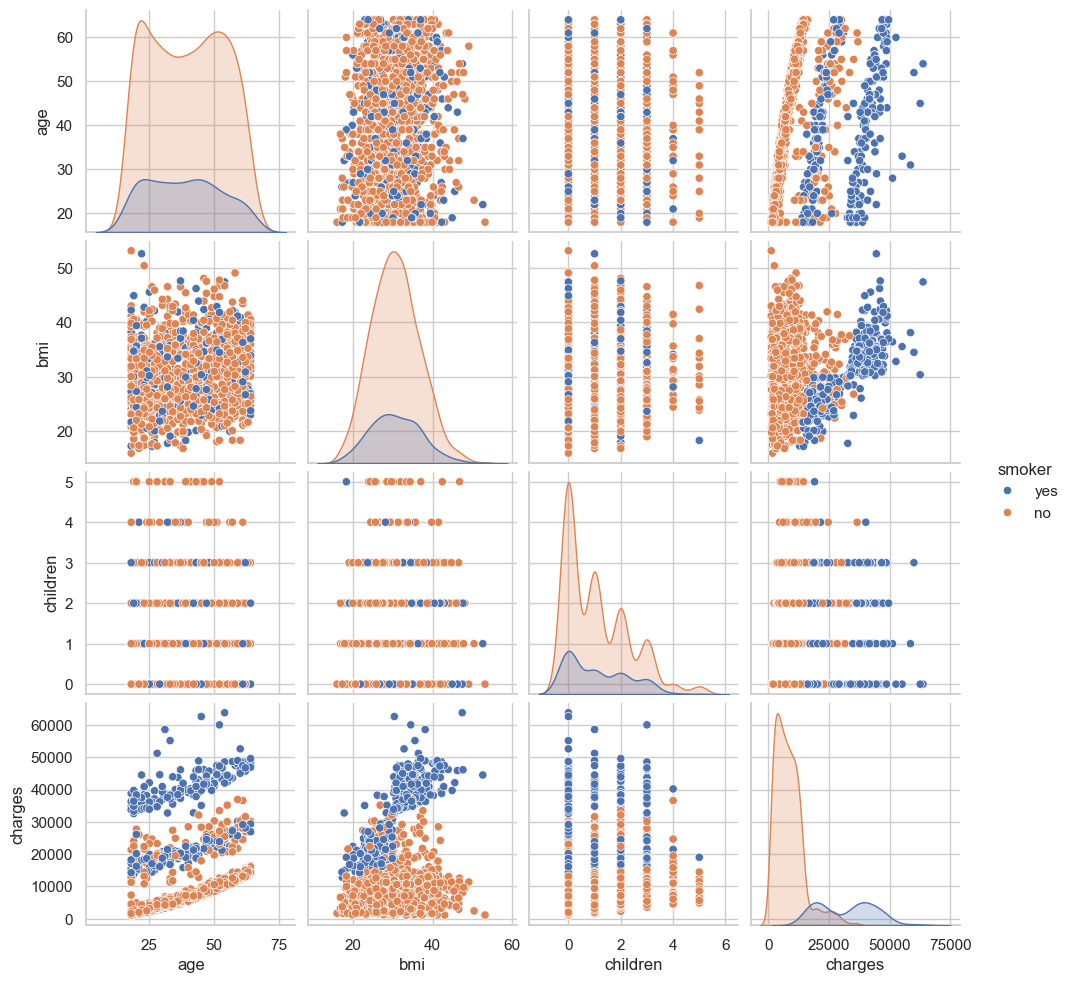

In [32]:
# 흡연여부를 기준으로 산점도 비교
sns.pairplot(data=df,hue='smoker')
plt.show()

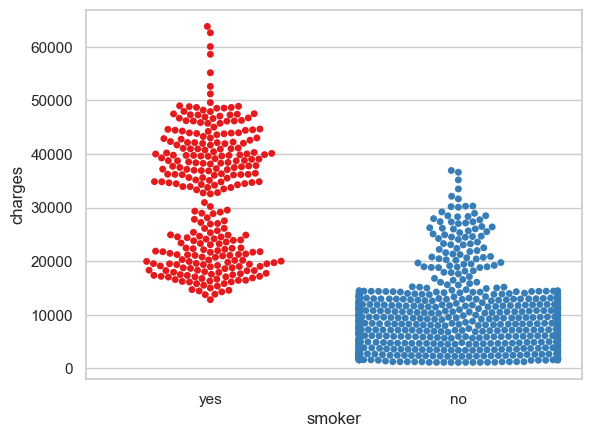

In [33]:
# 스웜 차트로 흡연고객들의 의료비와 비흡연 고개들의 의료비 사이의 차이 찾기
sns.swarmplot(x=df['smoker'],y=df['charges'], palette='Set1')
plt.show()

▲ 평균적으로  비흡연자는  흡연자보다  요금이  적게  청구되며  가장  많이  지불하는  고객은  흡연자이고  가장
적게  지불하는  고객은  비흡연자입니다. 따라서  흡연  습관이  의료비를  결정합니다.

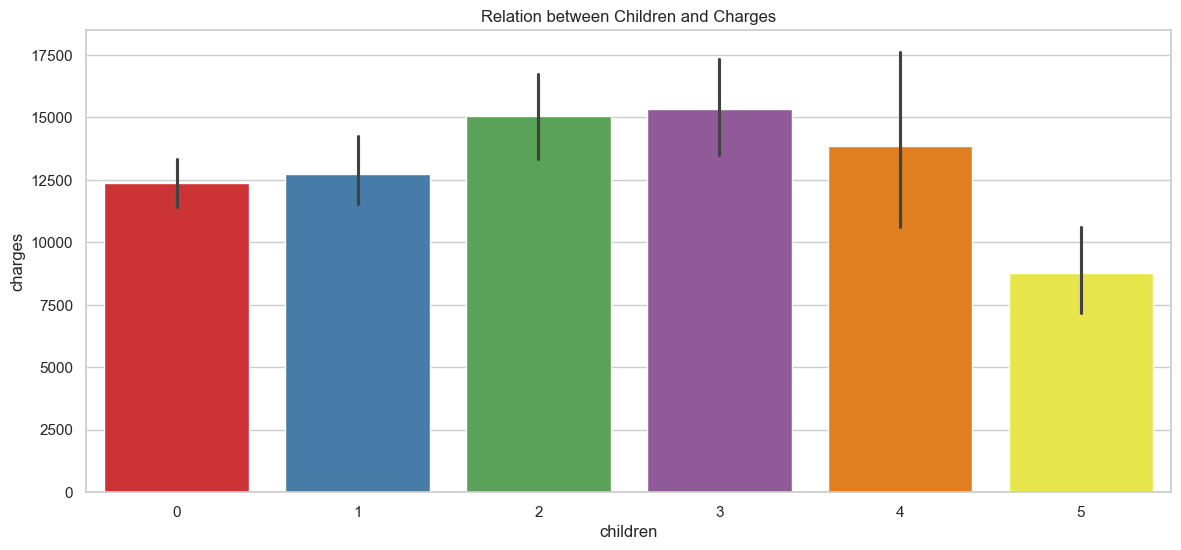

In [34]:
# 막대그래프로 자녀수와 의료비간의 관계 찾기
plt.figure(figsize=(14,6))
plt.title('Relation between Children and Charges')
#sns.regplot(x=df['children'],y=df['charges'])
sns.barplot(x=df['children'], y=df['charges'], palette='Set1')
plt.show()

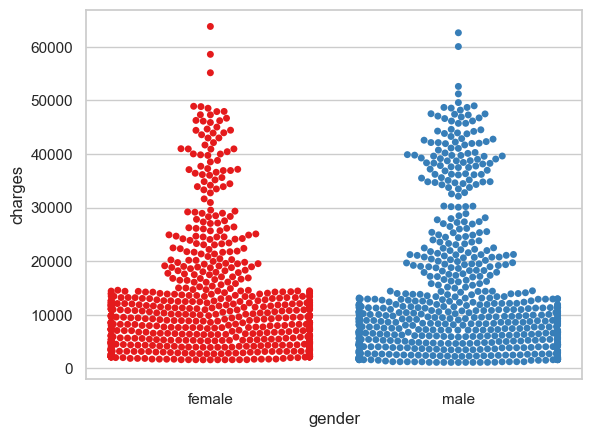

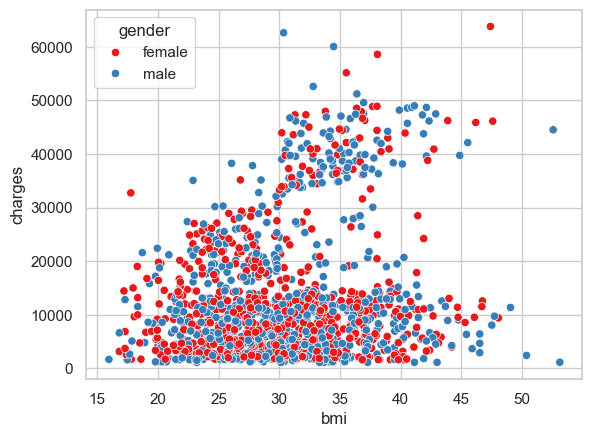

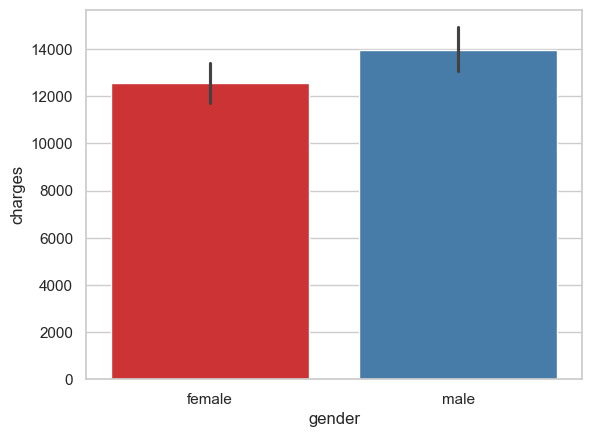

In [35]:
# 남성고객과 여성 고개들의 의료비 관계 찾기
sns.swarmplot(x=df['gender'],y=df['charges'],palette='Set1')
plt.show()
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['gender'],palette='Set1')
plt.show()
sns.barplot(x=df['gender'], y=df['charges'],palette='Set1')
plt.show()

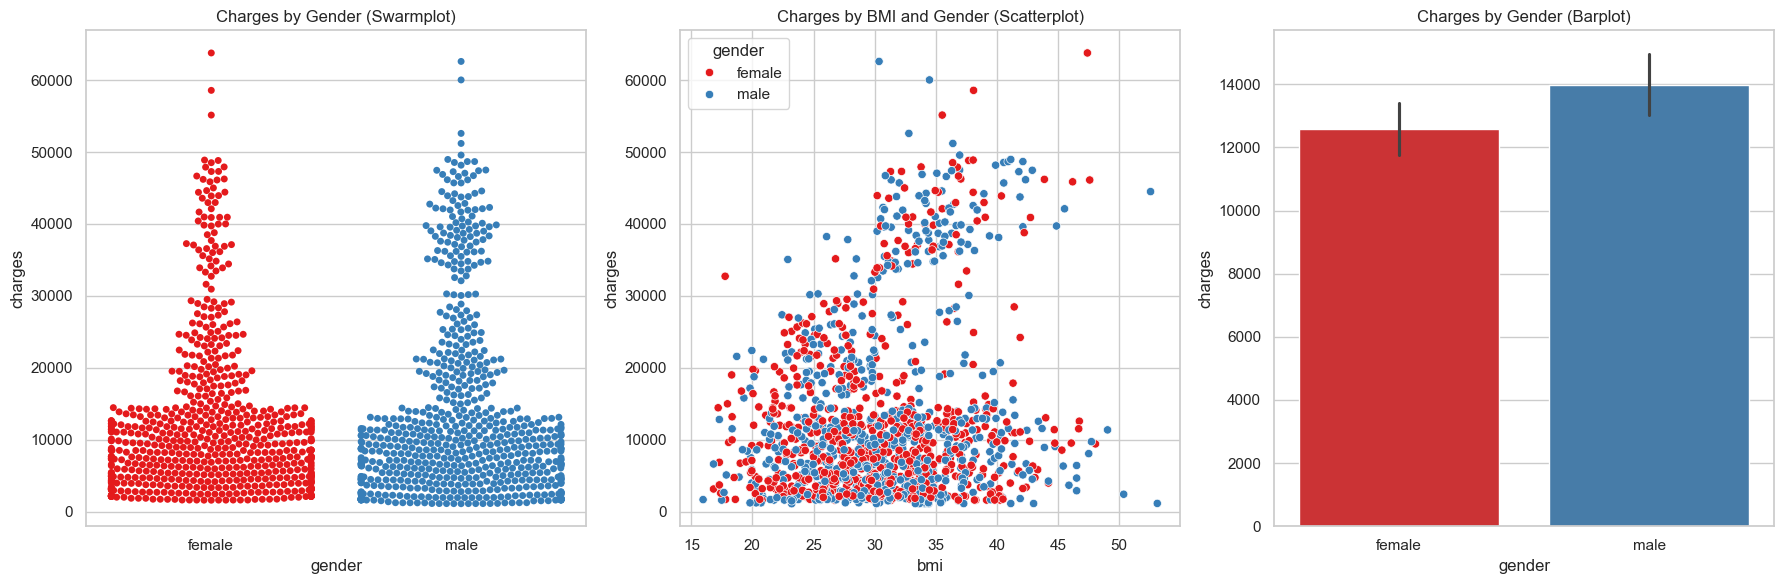

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Swarmplot
sns.swarmplot(x=df['gender'], y=df['charges'], palette='Set1', ax=axes[0])
axes[0].set_title('Charges by Gender (Swarmplot)')

# Scatterplot
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['gender'], palette='Set1', ax=axes[1])
axes[1].set_title('Charges by BMI and Gender (Scatterplot)')

# Barplot
sns.barplot(x=df['gender'], y=df['charges'], palette='Set1', ax=axes[2])
axes[2].set_title('Charges by Gender (Barplot)')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

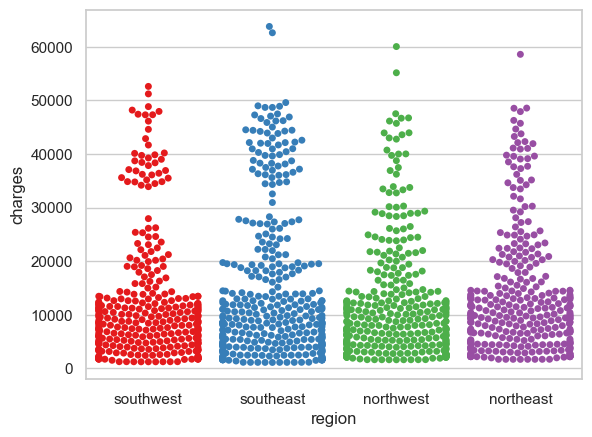

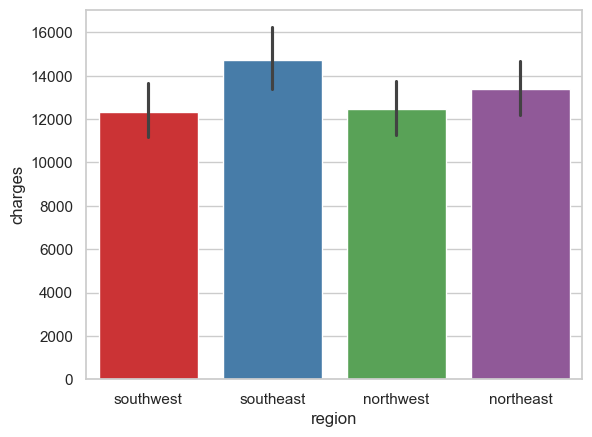

In [37]:
# 지역과 의료비의 관계 찾기
sns.swarmplot(x=df['region'],y=df['charges'],palette='Set1')
plt.show()
sns.barplot(x=df['region'], y=df['charges'], palette='Set1')
plt.show()

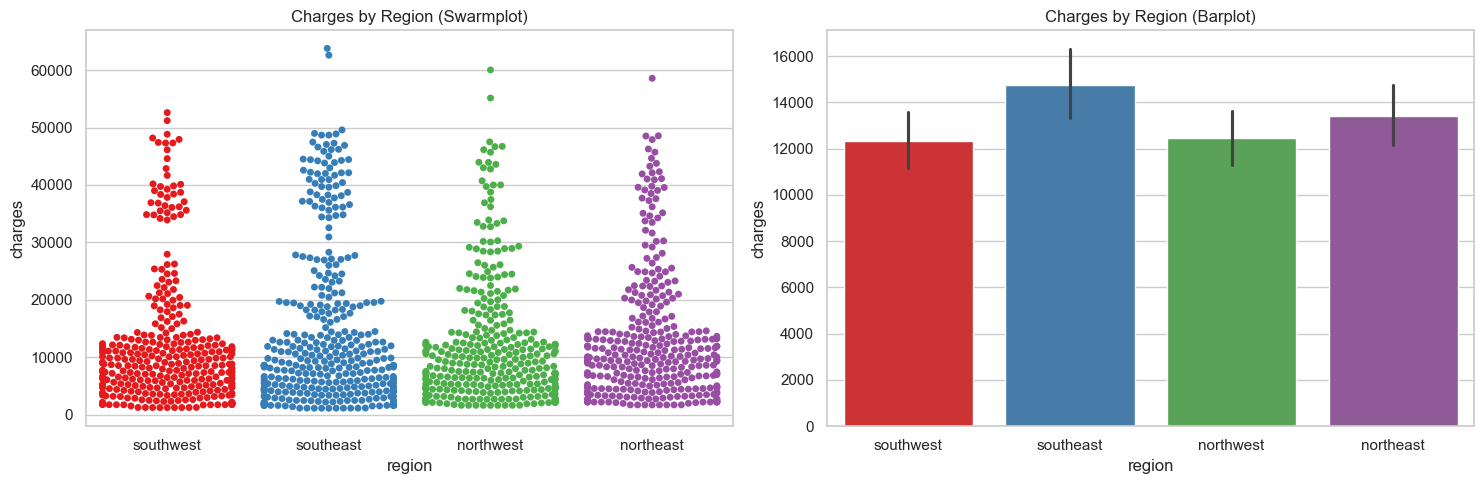

In [38]:
# 지역과 의료비의 관계 찾기
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1행 2열, figsize로 가로 크기 조정

# Swarmplot
sns.swarmplot(x=df['region'], y=df['charges'], palette='Set1', ax=axes[0])
axes[0].set_title('Charges by Region (Swarmplot)')

# Barplot
sns.barplot(x=df['region'], y=df['charges'], palette='Set1', ax=axes[1])
axes[1].set_title('Charges by Region (Barplot)')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

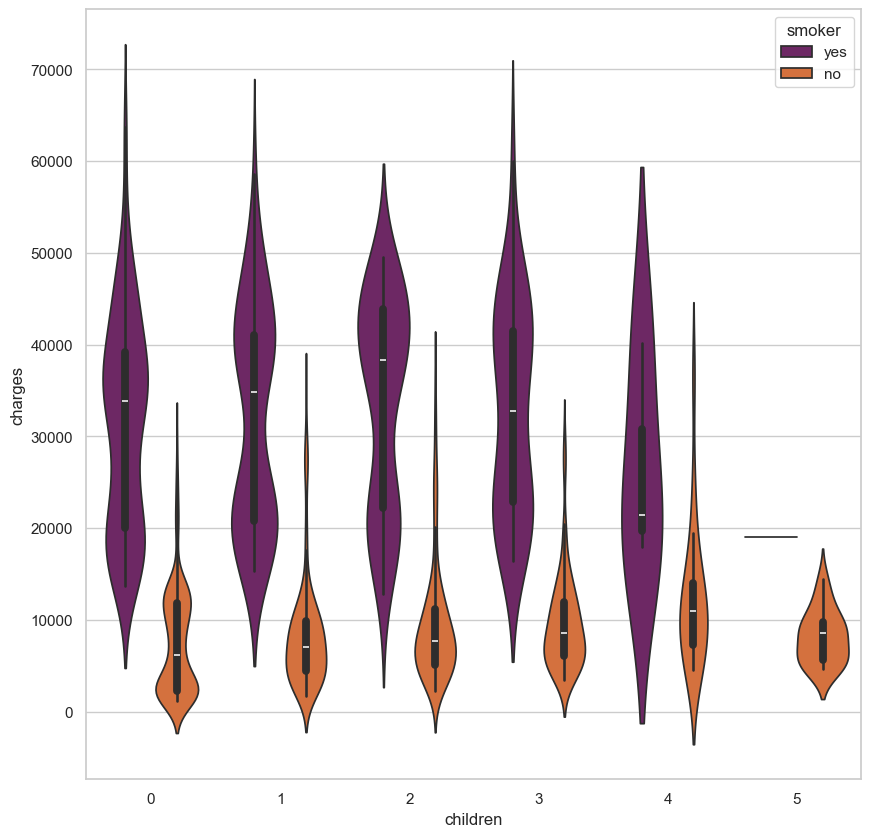

In [39]:
# 자녀별 흡연여부별 분포 확인
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
orient='v', hue='smoker', palette='inferno')

# 2.데이터 전처리

In [40]:
# 문자 데이터를 카테고리로 변환 - astype('category') 사용
df[['gender', 'smoker', 'region']] = df[['gender', 'smoker', 'region']].astype('category')    # ... 코드 입력

df.dtypes

age            int64
gender      category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [41]:
# Label Encoder를 사용해 카테고리 변수의 값들을 숫자로 변환
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()    # ... 코드 입력

# gender 변환
label.fit(df.gender.drop_duplicates())
df.gender = label.transform(df.gender)

# smoker 변환
label.fit(df.smoker.drop_duplicates())  # ... 코드 입력
df.smoker = label.transform(df.smoker)

# region 변환
label.fit(df.region.drop_duplicates())  # ... 코드 입력
df.region = label.transform(df.region)  # ... 코드 입력

df.dtypes

age           int64
gender        int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

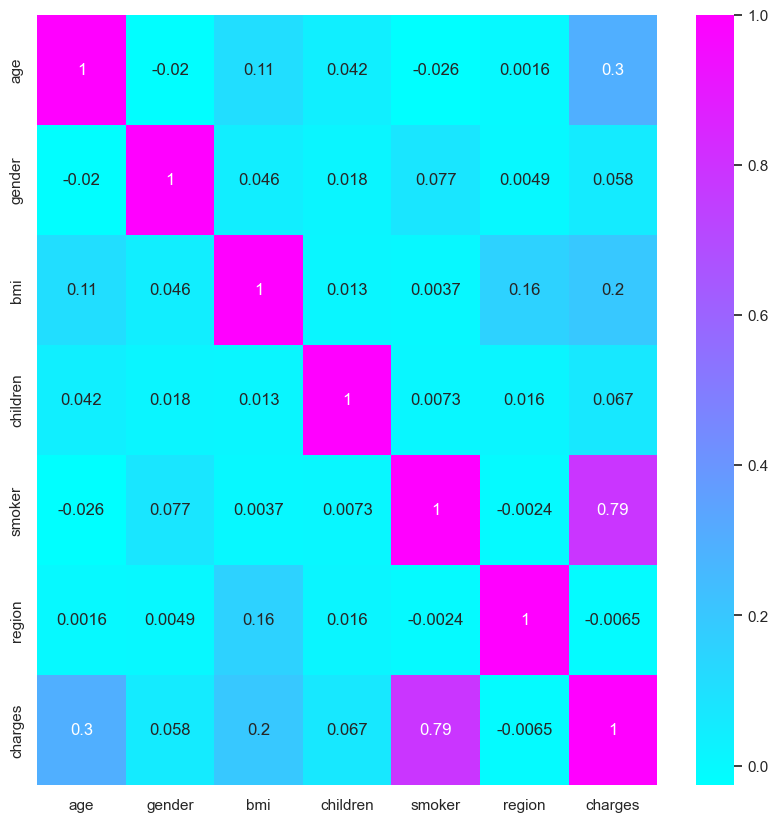

In [42]:
# 변수간 상관계수
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='cool')    # ... 코드 입력

# 3.특성/타겟, 학습용/테스트용 데이터 셋 준비

In [43]:
from sklearn.model_selection import train_test_split
# target : charges
x = df.drop(['charges'], axis = 1)   # ... 코드 입력
y = df['charges']   # ... 코드 입력

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)   # ... 코드 입력

# 4.모델 구성 : 학습,예측, 평가

## 4.1 선형회귀
- 모델: 기본적인 선형 회귀 모델입니다. 목표는 독립 변수(X)와 종속 변수(y) 사이의 직선 관계를 학습합니다.
- 단순하고 빠르며 해석하기 쉽습니다.
- 과적합(overfitting) 가능성이 높습니다. 모든 피처를 사용해 예측하려고 하기 때문입니다.

- **피처가 적고 다중공선성 문제가 없을 때 사용하면 좋음**

In [44]:
# 선형회귀(LinearRegression)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 객체 생성
model_lr = LinearRegression()

# 학습하기
model_lr.fit(x_train, y_train)

# 예측하기
print(model_lr.intercept_)
print(model_lr.coef_)
print(model_lr.score(x_test, y_test))

-10658.974155442073
[  244.40254189  -203.81680641   308.01805142   495.56546634
 23771.78167483  -377.96465113]
0.7526726290709554


In [45]:
# 컬럼명과 계수를 쌍으로 묶기
coef_df = pd.DataFrame({
    'Feature': x_train.columns,  # 각 피처 이름
    'Coefficient': model_lr.coef_ # 각 피처의 계수
})

# 계수를 기준으로 정렬 (절댓값 기준으로 내림차순 정렬)
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# 정렬된 계수를 출력
print(coef_df)

print(f'Lin_reg.score : {model_lr.score(x_test, y_test)}')

    Feature   Coefficient
4    smoker  23771.781675
3  children    495.565466
5    region   -377.964651
2       bmi    308.018051
0       age    244.402542
1    gender   -203.816806
Lin_reg.score : 0.7526726290709554


MSE train data: 35403275.585, MSE test data: 41607776.511
R2 train data: 0.749, R2 test data: 0.753


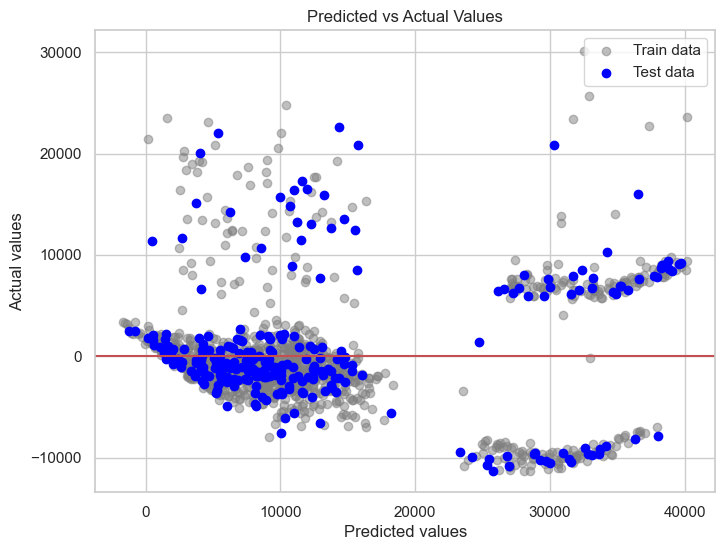

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Predictions from the RandomForestRegressor
x_train_pred = model_lr.predict(x_train)
x_test_pred = model_lr.predict(x_test)

# Mean squared error and R2 scores
print('MSE train data: %.3f, MSE test data: %.3f' % (metrics.mean_squared_error(x_train_pred, y_train), metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % (metrics.r2_score(y_train, x_train_pred), metrics.r2_score(y_test, x_test_pred)))

# Plot
plt.figure(figsize=(8,6))

# Plot training data
plt.scatter(x_train_pred, y_train - x_train_pred, c='grey', label='Train data', alpha=0.5)

# Plot test data
plt.scatter(x_test_pred, y_test - x_test_pred, c='blue', label='Test data')

# Plot horizontal line for error=0
plt.axhline(y=0, color='r', linestyle='-')

# Labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

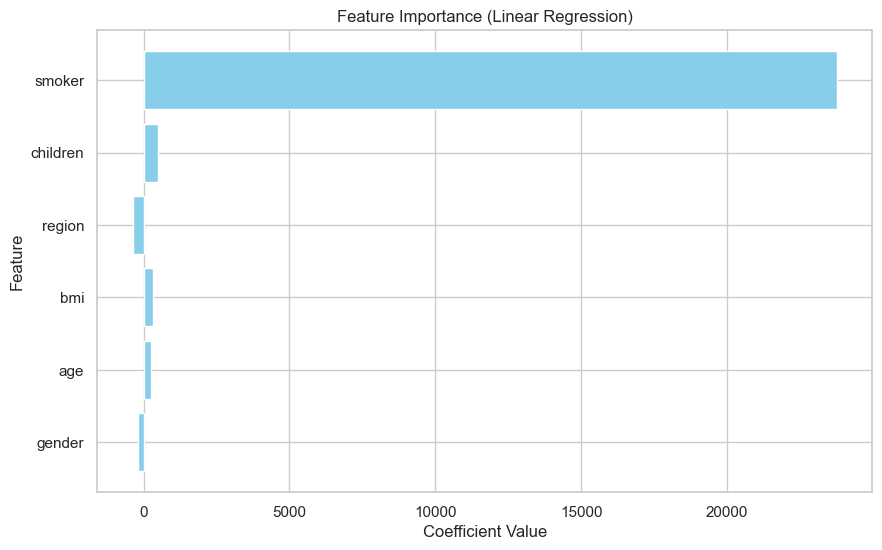

In [47]:
import matplotlib.pyplot as plt

# 중요 변수를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')  # 가로 막대 그래프(barh)
plt.xlabel('Coefficient Value')  # x축 레이블
plt.ylabel('Feature')  # y축 레이블
plt.title('Feature Importance (Linear Regression)')  # 그래프 제목
plt.gca().invert_yaxis()  # 큰 값이 위에 오도록 y축 반전
plt.show()

## 4.2 릿지 회귀
- L2 정규화를 사용하여 모델을 학습합니다. 즉, 회귀 계수에 패널티를 부여합니다.
- 손실 함수에 가중치 계수의 제곱합을 추가해 과적합을 방지합니다
- 모델이 복잡한 경우에도 과적합을 줄여 안정적인 성능을 냅니다.
- 모든 피처를 사용하지만 회귀 계수의 크기를 줄입니다.

- **피처가 많고 과적합이 우려될 때 사용하면 좋음**

In [48]:
# 릿지회귀(Ridge)
from sklearn.linear_model import Ridge

# 객체 생성
model_ridge = Ridge(alpha=0.5)
# 학습하기
model_ridge.fit(x_train, y_train)   # ... 코드 입력

print(model_ridge.intercept_)
print(model_ridge.coef_)
print(model_ridge.score(x_test, y_test))

-10641.314091338598
[  244.34042397  -201.10723643   307.92303881   495.90249348
 23702.74866396  -377.99799347]
0.7526240353110314


In [49]:
# 컬럼명과 계수를 쌍으로 묶기
coef_df = pd.DataFrame({
    'Feature': x_train.columns,  # 각 피처 이름
    'Coefficient': model_ridge.coef_ # 각 피처의 계수
})

# 계수를 기준으로 정렬 (절댓값 기준으로 내림차순 정렬)
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# 정렬된 계수를 출력
print(coef_df)

print(model_ridge.score(x_test, y_test))

    Feature   Coefficient
4    smoker  23702.748664
3  children    495.902493
5    region   -377.997993
2       bmi    307.923039
0       age    244.340424
1    gender   -201.107236
0.7526240353110314


## 4.3 라쏘회귀
- Lasso는 스케일에 민감하므로 **정규화(Scaling)**가 필수적
- L1 정규화를 사용하여 일부 회귀 계수를 0으로 만듭니다
- 이로 인해 **변수 선택(feature selection)**을 수행합니다. 불필요한 변수의 계수를 0으로 만들어 모델을 간소화합니다.
- 피처 선택 기능을 내장하고 있어 불필요한 변수를 제거하므로 모델을 해석하기 쉬워집니다. 회귀 계수가 0인 변수는 예측에 기여하지 않습니다.

- 불필요한 변수를 자동으로 제거할 때 사용하면 좋음

In [50]:
# 라쏘회귀(Lasso)
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 스케일러를 적용하고 변환합니다.
x_train_scaled = scaler.fit_transform(x_train)

# 적용된 스케일러를 사용하여 테스트 데이터를 변환합니다.
x_test_scaled = scaler.transform(x_test)


# Lasso 모델을 초기화합니다. normalize 매개변수는 더 이상 사용되지 않으므로 제거합니다.
model_lasso = Lasso(alpha=0.2, fit_intercept=True,  precompute=False, max_iter=1000,
tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

# 스케일링된 훈련 데이터를 사용하여 Lasso 모델을 학습시킵니다.
model_lasso.fit(x_train_scaled, y_train)

# 절편과 계수를 출력합니다.
print(model_lasso.intercept_)
print(model_lasso.coef_)

# 스케일링된 테스트 데이터를 사용하여 모델을 평가합니다.
print(model_lasso.score(x_test_scaled, y_test))

13083.49369442376
[3446.61532315 -101.68184398 1868.41722699  595.25928728 9544.9951613
 -418.87543797]
0.752669480134209


MSE train data: 35403275.839, MSE test data: 41608306.256
R2 train data: 0.749, R2 test data: 0.753


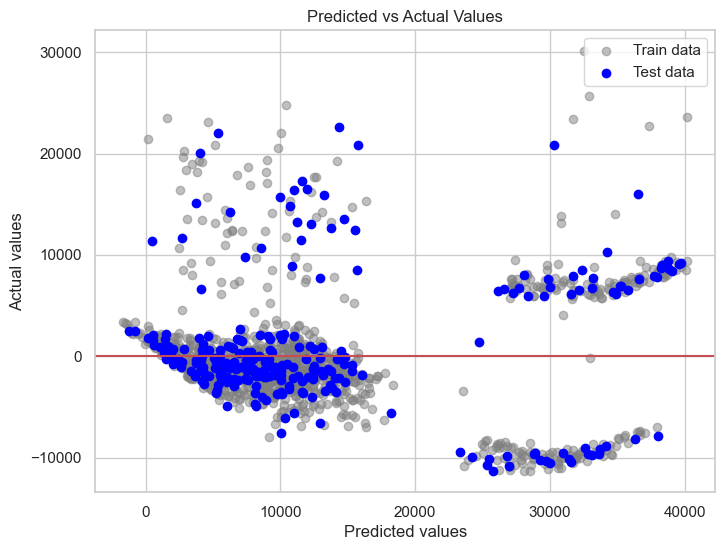

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Predictions from the RandomForestRegressor
x_train_pred = model_lasso.predict(x_train_scaled)
x_test_pred = model_lasso.predict(x_test_scaled)

# Mean squared error and R2 scores
print('MSE train data: %.3f, MSE test data: %.3f' % (metrics.mean_squared_error(x_train_pred, y_train), metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % (metrics.r2_score(y_train, x_train_pred), metrics.r2_score(y_test, x_test_pred)))

# Plot
plt.figure(figsize=(8,6))

# Plot training data
plt.scatter(x_train_pred, y_train - x_train_pred, c='grey', label='Train data', alpha=0.5)

# Plot test data
plt.scatter(x_test_pred, y_test - x_test_pred, c='blue', label='Test data')

# Plot horizontal line for error=0
plt.axhline(y=0, color='r', linestyle='-')

# Labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

## 4.4 앙상블 모델

### 4.5.1 모델 구성하기 - 학습 및 예측

In [51]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor as rfr

x = df.drop(['charges'], axis=1)
y = df.charges

#model_rfr = rfr(n_estimators = 100, criterion = 'mse',random_state = 1, n_jobs = -1)
model_rfr = rfr(n_estimators = 100, criterion = 'squared_error', random_state = 1, n_jobs = -1)
model_rfr.fit(x_train,y_train)

x_train_pred = model_rfr.predict(x_train)
x_test_pred = model_rfr.predict(x_test)
print('MSE train data: %.3f, MSE test data: %.3f' % (metrics.mean_squared_error(x_train_pred, y_train), metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % (metrics.r2_score(y_train, x_train_pred), metrics.r2_score(y_test, x_test_pred)))

MSE train data: 3342536.635, MSE test data: 27301132.995
R2 train data: 0.976, R2 test data: 0.838


### 4.5.2 모델 평가하기

MSE train data: 3342536.635, MSE test data: 27301132.995
R2 train data: 0.976, R2 test data: 0.838


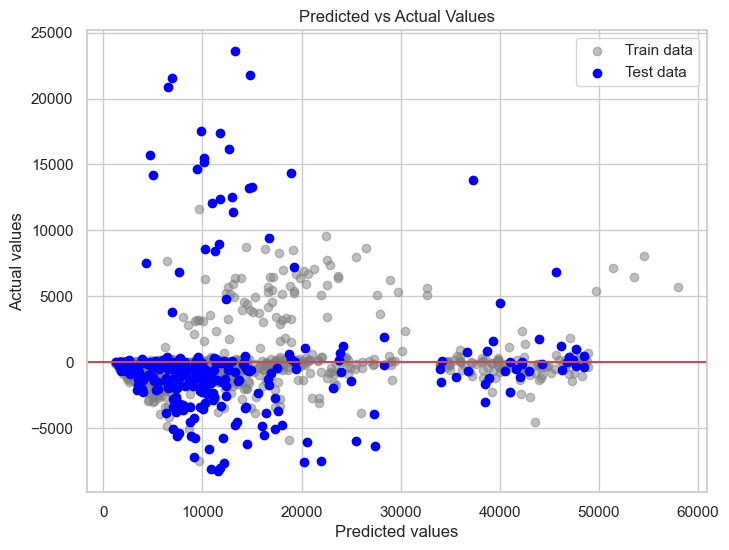

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Predictions from the RandomForestRegressor
x_train_pred = model_rfr.predict(x_train)
x_test_pred = model_rfr.predict(x_test)

# Mean squared error and R2 scores
print('MSE train data: %.3f, MSE test data: %.3f' % (metrics.mean_squared_error(x_train_pred, y_train), metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % (metrics.r2_score(y_train, x_train_pred), metrics.r2_score(y_test, x_test_pred)))

# Plot
plt.figure(figsize=(8,6))

# Plot training data
plt.scatter(x_train_pred, y_train - x_train_pred, c='grey', label='Train data', alpha=0.5)

# Plot test data
plt.scatter(x_test_pred, y_test - x_test_pred, c='blue', label='Test data')

# Plot horizontal line for error=0
plt.axhline(y=0, color='r', linestyle='-')

# Labels and title
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

### 4.5.3 중요 변수 찾기

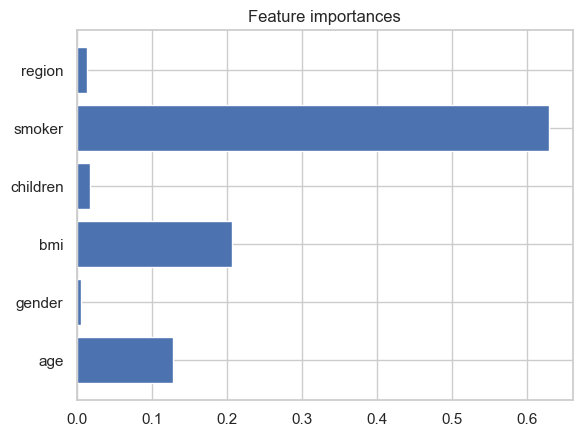

In [53]:
# 랜덤포레스트를 활용한 중요 변수 찾기

importances = model_rfr.feature_importances_
plt.figure()
plt.title("Feature importances")
plt.barh(x_train.columns, importances, align='center')
plt.show()
